### Buy n' Hold | S&P500 vs All Weather Portfolio (Ray Dalio)
#### Período de análise: Janeiro de 2015 até Março de 2021.
##### Autor: Saulo Brendo Alves de Jesus 
##### LinkedIn: linkedin.com/in/saulo-brendo/

### Importação de Pacotes 

In [1]:
# Importar pacotes utilizados
%matplotlib inline
import quantstats as qs 
import pandas as pd     
import numpy as np   
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pyplot
from pandas_datareader import data
import warnings
warnings.simplefilter("ignore")

### Obtenção de dados via API do Yahoo Finance

In [2]:
# Definir os tickers dos ativos
tickers = ["VTI","VGLT","VGIT","IAU","PDBC","^GSPC"]

# Definindo período
init_data = '1/1/2015'
end_data = "31/03/2021"

# Solicitação de dados através da API
tickers_data = data.DataReader(tickers,'yahoo',init_data,end_data)['Adj Close']
tickers_data.head()

Symbols,IAU,PDBC,VGIT,VGLT,VTI,^GSPC
Date,,,,,,
2015-01-02,11.50,18.624228,57.534119,66.949142,94.213509,2058.199951
2015-01-05,11.68,18.395386,57.623070,67.965469,92.594643,2020.579956
2015-01-06,11.79,18.172707,57.809902,69.041565,91.687378,2002.609985
2015-01-07,11.73,18.066204,57.872185,68.896339,92.781448,2025.900024
2015-01-08,11.69,18.078529,57.738705,68.170425,94.418076,2062.139893


In [17]:
# Informações sobre os dados
tickers_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1572 entries, 2015-01-02 to 2021-03-31
Data columns (total 6 columns):
IAU      1572 non-null float64
PDBC     1572 non-null float64
VGIT     1572 non-null float64
VGLT     1572 non-null float64
VTI      1572 non-null float64
^GSPC    1572 non-null float64
dtypes: float64(6)
memory usage: 86.0 KB


In [4]:
# Estatística Descritiva dos Preços
tickers_data.describe()

Symbols,IAU,PDBC,VGIT,VGLT,VTI,^GSPC
count,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000
mean,13.130693,15.702971,61.639585,75.534332,128.029114,2630.630139
std,2.156402,1.613302,3.836897,10.762640,29.073436,508.827033
min,10.150000,11.219267,57.213818,62.200047,83.969048,1829.079956
25%,11.730000,14.845553,58.791989,67.970201,100.403912,2132.292542
50%,12.345000,15.728496,60.000111,70.908730,128.093155,2632.989990
75%,14.100000,16.816202,64.301674,82.061325,144.262691,2923.904968
max,19.709999,18.949888,69.783829,102.991653,208.156357,3974.540039


### Cálculo de Retornos

In [5]:
# Obter valor dos retornos diários
retornos = tickers_data.pct_change()
retornos.head()

Symbols,IAU,PDBC,VGIT,VGLT,VTI,^GSPC
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.015652,-0.012287,0.001546,0.015181,-0.017183,-0.018278
2015-01-06,0.009418,-0.012105,0.003242,0.015833,-0.009798,-0.008893
2015-01-07,-0.005089,-0.005861,0.001077,-0.002103,0.011933,0.011630
2015-01-08,-0.003410,0.000682,-0.002306,-0.010536,0.017640,0.017888


In [6]:
# Estatística Descritiva dos Retornos
retornos.describe()

Symbols,IAU,PDBC,VGIT,VGLT,VTI,^GSPC
count,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000
mean,0.000260,0.000009,0.000101,0.000169,0.000569,0.000487
std,0.008872,0.010777,0.002263,0.008305,0.011685,0.011692
min,-0.053340,-0.078474,-0.016131,-0.065771,-0.113808,-0.119841
25%,-0.004540,-0.005481,-0.001243,-0.004705,-0.003300,-0.003218
50%,0.000690,0.000563,0.000061,0.000513,0.000727,0.000633
75%,0.004893,0.005940,0.001390,0.004871,0.005615,0.005325
max,0.049505,0.047675,0.014111,0.066366,0.094898,0.093828


In [7]:
# Obter valores de retornos acumulados
retornos_acumulados = (1 + retornos).cumprod()
retornos_acumulados.head()

Symbols,IAU,PDBC,VGIT,VGLT,VTI,^GSPC
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,1.015652,0.987713,1.001546,1.015181,0.982817,0.981722
2015-01-06,1.025217,0.975756,1.004793,1.031254,0.973187,0.972991
2015-01-07,1.020000,0.970038,1.005876,1.029085,0.984800,0.984307
2015-01-08,1.016522,0.970700,1.003556,1.018242,1.002171,1.001914


### Indexação e Visualização dos Retornos Acumulados

In [8]:
# Indexação através do método .iloc[]
retornos_acumulados.iloc[0] = 1
retornos_acumulados.head()

Symbols,IAU,PDBC,VGIT,VGLT,VTI,^GSPC
Date,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,1.015652,0.987713,1.001546,1.015181,0.982817,0.981722
2015-01-06,1.025217,0.975756,1.004793,1.031254,0.973187,0.972991
2015-01-07,1.020000,0.970038,1.005876,1.029085,0.984800,0.984307
2015-01-08,1.016522,0.970700,1.003556,1.018242,1.002171,1.001914


Text(0.5, 1.0, 'Gráfico de Retorno Acumulado AWP e S&P 500')

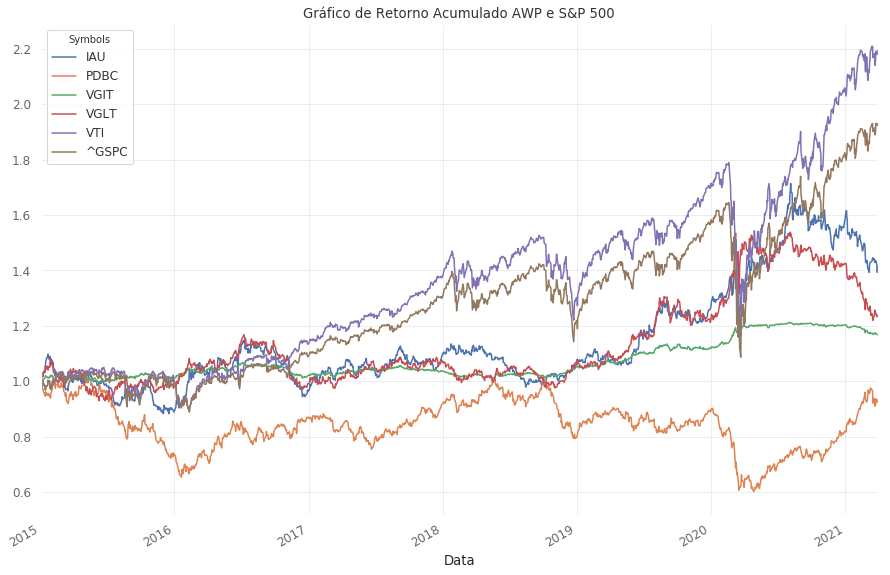

In [9]:
# Visualização de Retorno Acumulado dos ativos
retornos_acumulados.iloc[:, :6].plot(figsize = (15,10))
plt.pyplot.xlabel('Data')
plt.pyplot.title("Gráfico de Retorno Acumulado AWP e S&P 500")

### Correlação

In [10]:
# Calcular a correlação entre os ativos
corr = retornos.corr()
corr

Symbols,IAU,PDBC,VGIT,VGLT,VTI,^GSPC
Symbols,,,,,,
IAU,1.000000,0.151188,0.383601,0.323258,-0.012813,-0.013970
PDBC,0.151188,1.000000,-0.194723,-0.215910,0.393058,0.383873
VGIT,0.383601,-0.194723,1.000000,0.861346,-0.392768,-0.397090
VGLT,0.323258,-0.215910,0.861346,1.000000,-0.387059,-0.391321
VTI,-0.012813,0.393058,-0.392768,-0.387059,1.000000,0.996302
^GSPC,-0.013970,0.383873,-0.397090,-0.391321,0.996302,1.000000


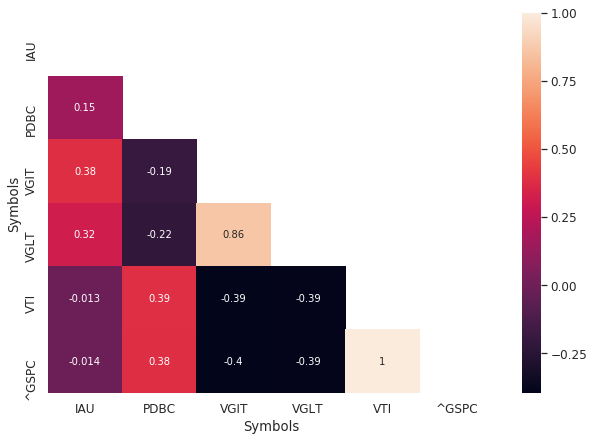

In [11]:
# Criar mascara para visualizar apenas uma das partes
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plotar gráfico de correlação
with sns.axes_style("white"):
    f, ax = pyplot.subplots(figsize=(10, 7))
    ax = sns.heatmap(corr, mask=mask, annot=True)

### Simulação de Carteira AWP

In [12]:
# Definindo pesos dos ativos
pesos = np.array([0.08, 0.07, 0.15, 0.4, 0.3])

# Criando carteira simulada com $10.000 iniciais
portfolio = 10000 * retornos_acumulados.iloc[:, :5] * pesos

# Adicionando coluna Saldo 
portfolio["Saldo"] = portfolio.sum(axis = 1)

# Adicionando coluna com variação do retorno da carteira
portfolio["Retorno"] = portfolio["Saldo"].pct_change()

portfolio.tail()

Symbols,IAU,PDBC,VGIT,VGLT,VTI,Saldo,Retorno
Date,,,,,,,
2021-03-25,1143.652211,639.328538,1761.223278,4993.193285,6468.817378,15006.214691,-0.000372
2021-03-26,1147.826087,654.738568,1757.837239,4973.509081,6574.534935,15108.445910,0.006813
2021-03-29,1133.912990,654.362705,1754.711772,4932.351987,6543.647606,15018.987060,-0.005921
2021-03-30,1114.434814,646.469794,1753.670082,4956.807387,6541.737129,15013.119207,-0.000391
2021-03-31,1131.130451,647.785279,1751.065360,4938.913237,6581.540339,15050.434665,0.002486


### Comparação e Visualização dos Retornos

In [13]:
# Criar Data Frame contendo retornos diários do S&P500 e AWP
comp_retornos = pd.DataFrame({
    'S&P500': retornos["^GSPC"],
    'AWP': portfolio["Retorno"]
})

# Calcular os Retornos acumulados
comp_retornos = (1 + comp_retornos).cumprod()
comp_retornos.head()

,S&P500,AWP
Date,,
2015-01-02,NaN,NaN
2015-01-05,0.981722,1.001541
2015-01-06,0.972991,1.005497
2015-01-07,0.984307,1.007458
2015-01-08,1.001914,1.007752


Text(0.5, 1.0, 'Retorno Acumulado | S&P500 vs AWP')

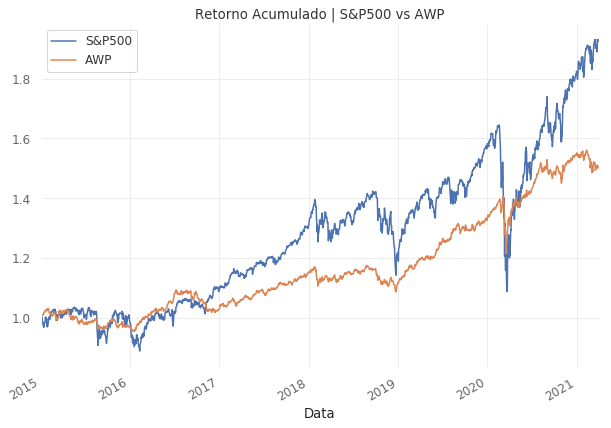

In [14]:
# Visualização de Retorno Acumulado S&P500 vs All Weather Portfolio
comp_retornos.plot(figsize = (10,7))
plt.pyplot.xlabel('Data')
plt.pyplot.title("Retorno Acumulado | S&P500 vs AWP")